In [1]:
from google.colab import files
uploaded = files.upload()

Saving nyc-service-volunteer-opportunities.csv to nyc-service-volunteer-opportunities.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:

def load_data():
    """Load and preprocess the data"""
    df = pd.read_csv('nyc-service-volunteer-opportunities.csv')  # Use uploaded filename
    df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
    return df

print("Loading data...")
df = load_data()

Loading data...


Generating visualizations...


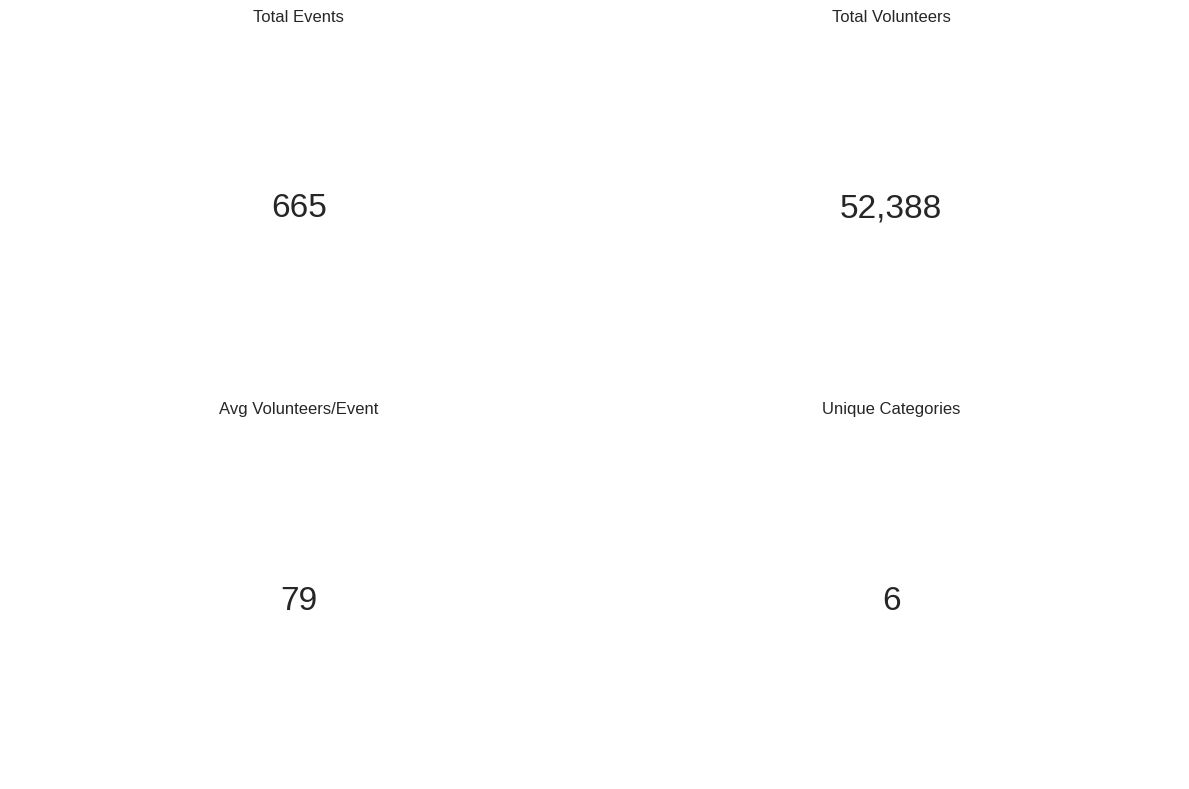

In [7]:
def plot_summary_stats(df):
    stats = {
        'Total Events': len(df),
        'Total Volunteers': df['vol_requests'].sum(),
        'Avg Volunteers/Event': df['vol_requests'].mean(),
        'Unique Categories': df['category_desc'].nunique()
    }
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    for (title, value), ax in zip(stats.items(), axes):
        ax.text(0.5, 0.5, f"{value:,.0f}", ha='center', va='center', fontsize=24)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
print("Generating visualizations...")
plot_summary_stats(df)

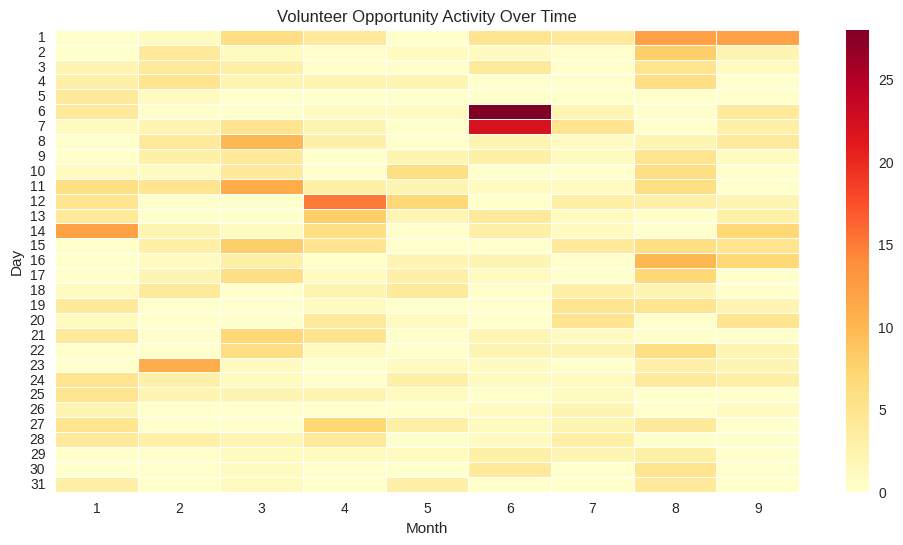

In [8]:
def plot_heatmap(df):
    date_counts = df.groupby('created_date').size().reset_index(name='count')
    date_counts['year'] = date_counts['created_date'].dt.year
    date_counts['month'] = date_counts['created_date'].dt.month
    date_counts['day'] = date_counts['created_date'].dt.day
    pivot = date_counts.pivot_table(values='count', index='day', columns='month', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.5)
    plt.title('Volunteer Opportunity Activity Over Time')
    plt.xlabel('Month')
    plt.ylabel('Day')
    plt.show()
plot_heatmap(df)

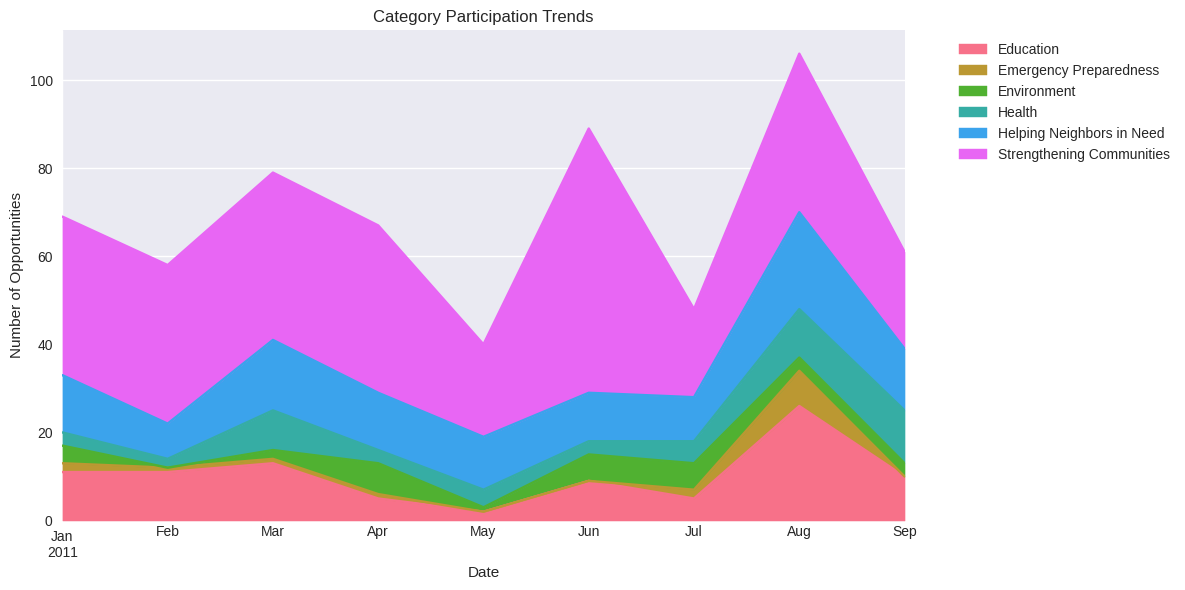

In [9]:
def plot_category_trends(df):
    monthly_cats = df.groupby([
        df['created_date'].dt.to_period('M'),
        'category_desc'
    ]).size().unstack().fillna(0)
    monthly_cats.plot(kind='area', stacked=True, figsize=(12, 6))
    plt.title('Category Participation Trends')
    plt.xlabel('Date')
    plt.ylabel('Number of Opportunities')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_category_trends(df)

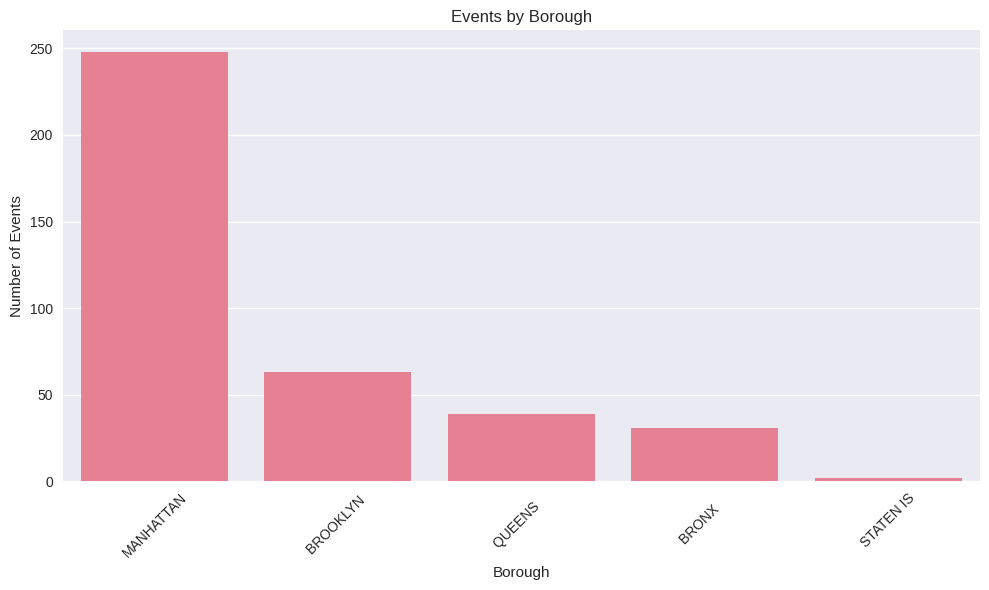

In [10]:
def plot_borough_distribution(df):
    borough_counts = df['Borough'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=borough_counts.index, y=borough_counts.values)
    plt.title('Events by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_borough_distribution(df)

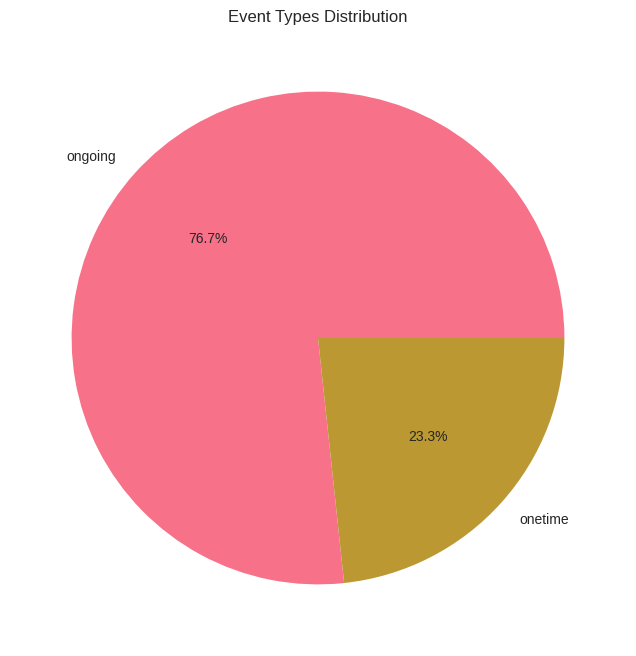

Done!


In [11]:
def plot_event_types(df):
    event_types = df['recurrence_type'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(event_types.values, labels=event_types.index, autopct='%1.1f%%')
    plt.title('Event Types Distribution')
    plt.show()

plot_event_types(df)
print("Done!")
